/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Frequency =125000000
Prescaler =64
Abtastzeit pro Sample =1953125.0
(1465, 3400)
F_min =38500
F_max =42500
Abtastzeit =[0.0, 574.4485294117648, 1148.8970588235295, 1723.3455882352941, 2297.794117647059, 2872.242647058824, 3446.6911764705883, 4021.139705882353, 4595.588235294118, 5170.036764705883, 5744.485294117648, 6318.933823529413, 6893.382352941177, 7467.830882352941, 8042.279411764706, 8616.727941176472, 9191.176470588236, 9765.625, 10340.073529411766, 10914.52205882353, 11488.970588235296, 12063.41911764706, 12637.867647058825, 13212.31617647059, 13786.764705882353, 14361.213235294119, 14935.661764705883, 15510.110294117649, 16084.558823529413, 16659.00735294118, 17233.455882352944, 17807.904411764706, 18382.352941176472, 18956.801470588238, 19531.25, 20105.698529411766, 20680.14705882353, 21254.595588235297, 21829.04411764706, 22403.492647058825, 22977.94117647059, 23552.389705882353, 24126.83823529412, 24701.286764705885, 25275.73529411765, 25850.183823529413, 26424.63235294118

array([[3],
       [1],
       [1],
       [3],
       [3],
       [0],
       [2],
       [4],
       [2],
       [3],
       [4],
       [4],
       [4],
       [0],
       [4],
       [3],
       [2],
       [4],
       [2],
       [3],
       [3],
       [2],
       [2],
       [0],
       [0],
       [1],
       [1],
       [4],
       [2],
       [2],
       [2],
       [4],
       [3],
       [2],
       [3],
       [2],
       [2],
       [2],
       [2],
       [4],
       [3],
       [4],
       [3],
       [2],
       [3],
       [2],
       [4],
       [3],
       [1],
       [3],
       [3],
       [3],
       [3],
       [1],
       [1],
       [4],
       [1],
       [1],
       [2],
       [2],
       [4],
       [4],
       [3],
       [1],
       [3],
       [1],
       [3],
       [4],
       [2],
       [4],
       [1],
       [4],
       [3],
       [3],
       [1],
       [0],
       [4],
       [3],
       [1],
       [3],
       [2],
       [3],
       [3],
    

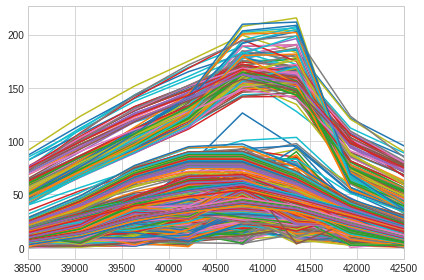

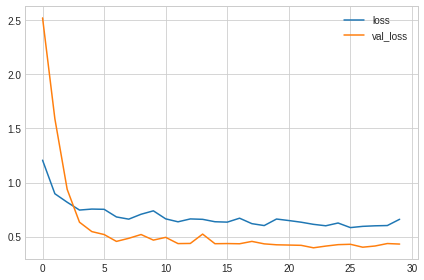

In [ ]:


#erforderliche Imports
import pandas as pd
import numpy as np
import math
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from random import *



#Einstellungen des Plot-Fensters
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10, )









#Funktion zum einlesen der Sensordaten
def Read_Timedata():

  #List für die y_Werte (um welches Objekt es sich bei dem Datensatz handelt)
  label_timesignals = []
  #List für die x_Werte (Sensordaten)
  timesignals = []

  #List mit den Namen der Objekten
  objClass = ['Object1', 'Object2', 'Object3', 'Object4', 'Object5']

  #Reads the csv data for each object and save it as Panda Dataframe
  for i in range(5):
    timesignal = pd.read_csv('/content/'+ objClass[i] +'.csv',delimiter=';', index_col= False ,
                              header = None,  decimal=",")
   

    #drops the first six columns , cause they are useless
    timesignal.drop( [0,1,2,3,4,5] , axis=1, inplace=True)
    #Add the Data of the Pd Dataframe in an List 
    timesignals.append(timesignal)

    #Add a Label in the y list for each object dataset
    for j in range(timesignal.shape[0]):
            label_timesignals.append(i)
            
  #transforms the List to a numpy array
  timesignals = np.asarray(timesignals)
  label_timesignals = np.asarray(label_timesignals)


  # Example für np.vstack  
  #>>> a = np.array([[1], [2], [3]])
  #>>> b = np.array([[2], [3], [4]])
  #>>> np.vstack((a,b))
  #array([[1],
  #       [2],
  #       [3],
  #       [2],
  #       [3],
  #       [4]])
  timesignals = np.vstack(timesignals)
  label_timesignals = np.vstack(label_timesignals)
 
  #Output of the function 
  return timesignals, label_timesignals


#Function for the FFT and feature extraction
def Get_Frequencysignal(timesignals):


  #Create two lists x (x-Axces Frequency) and y(Amplitude of the Frequency)
  x = []
  y = []

  #variable to count the number of signals
  signal_count = 0

  #Frequency  of the Sensor
  f = 125*1000000
  #Prescaler of the Sensor
  p=64

  #Sampling time per sample
  fs = f/p

  #ADC_Count is 3400
  ADC_count= timesignals.shape[1]

  print('Frequency ='+ str(f))
  print('Prescaler ='+ str(p))
  print('Abtastzeit pro Sample ='+ str(fs))
  print(timesignals.shape)
  



  #timesignal value with fft to complex value to absolute value
  frequencysignal = abs(np.fft.fft(timesignals))


  #Add the values y-values from 0 to 3400 of each signal to the variable y
  y = np.asarray(frequencysignal)
  
  #sinnvoller Frequenzbereich
  f_min = 38500 #38,5kHZ
  f_max = 42500 #42,5kHz

  #for the scaling of the x-axis
  freq_fac = fs / ADC_count


  # add x-axis points
  for i in range(ADC_count):
    x.append(i * freq_fac)

  print('F_min =' + str(f_min))
  print('F_max =' + str(f_max))
  print('Abtastzeit =' + str(x))

  #transform the list to an numpy array
  x = np.asarray(x)
 
  print(x.shape)
  print(y.shape)

  #create a panda dataframe with columns for the features
  df_feature = pd.DataFrame(columns=['Object','Mean_Amplitude','Center_Frequency',
                                     'Varianz','Steigung','Count_Peaks',
                                     'Distance_btw_Peaks','Varianz_x86'])
  
  ##################### Beginn Berechnung Feature:  Varianz_x86 ################
  #variables for calculation of the Varanz at point 68
  sum_x68_1 = 0
  sum_x68_2 = 0
  sum_x68_3 = 0
  sum_x68_4 = 0
  sum_x68_5 = 0

  #variables for counting the samples of each object
  count_point1 = 0
  count_point2 = 0
  count_point3 = 0
  count_point4 = 0
  count_point5 = 0


  #variable for the value of the variance on point x = 68
  varianz_pointx68_1 = 0
  varianz_pointx68_2 = 0
  varianz_pointx68_3 = 0
  varianz_pointx68_4 = 0
  varianz_pointx68_5 = 0

  # x point for the previous variables e.g. 68
  point = 70


  # for-schleife für jedes Sensor signal
  for i in range(label_timesignals.shape[0]) :

    # wenn label_timesignals von i "0" entspricht dann berechne die summe der amplituden am punkt z.B 68
    # und zähle die Signale
    if label_timesignals[i]== 0:
     sum_x68_1  = sum_x68_1  + y[i][point]
     count_point1 = count_point1 + 1

    elif  label_timesignals[i] == 1:
      sum_x68_2  = sum_x68_2  + y[i][point]
      count_point2 = count_point2 + 1  

    elif  label_timesignals[i] == 2:
      sum_x68_3  = sum_x68_3  + y[i][point]
      count_point3 = count_point3 + 1
    elif  label_timesignals[i] == 3:
      sum_x68_4  = sum_x68_4  + y[i][point]
      count_point4 = count_point4 + 1

    elif  label_timesignals[i] == 4:
      sum_x68_5  = sum_x68_5  + y[i][point]
      count_point5 = count_point5 + 1
  #berechne den Durchschnitt von den Amplituden an der Stelle z.B 68
  mean_x68_1 =  sum_x68_1/count_point1
  mean_x68_2 =  sum_x68_2/count_point2
  mean_x68_3 =  sum_x68_3/count_point3
  mean_x68_4 =  sum_x68_4/count_point4
  mean_x68_5 =  sum_x68_5/count_point5
  # wird für Feature: 'Varianz_x86' verwendet
  
   # for-schleife für jedes Sensor signal
  for i in range(label_timesignals.shape[0]) :
    #variables for calculation of the features
    max_amplitude = 0
    sum_mittelwert = 0
    sum_varianz = 0
    sum_amplitude = 0
    count_x = 0
    Steigung = 0
    count_peaks = 0
    peaks_amp = []
    peaks_freq = []
    mean_peak_distance = 0
    sum_distance = 0
    varianz_pointx68 = 0
    Nenner_pointx68 = 0
    

    #wenn label_timesignals objekt 0 entspricht dann...
    if label_timesignals[i]== 0:

      # ermittelt den ersten Teil des Nenners zur Berechnung der Varianz der Amplitude an einer Stelle
      Nenner_pointx68_1 = (y[i][point] - mean_x68_1)**2
      count = 1


      # ermittelt den Nenner der Varianz für 10 weitere zufällige Amplituden des Objektes an der Stelle
      for z in range(10):
        p = randint(0, count_point1-1)
        Nenner_pointx68_1 = Nenner_pointx68_1 + (y[p][point] - mean_x68_1)**2
        count = count + 1
        
      #Berechnet die Varanz der Amplitude an der Stelle z.B 68
      varianz_pointx68_1 = Nenner_pointx68_1 / count

      varianz_pointx68 = varianz_pointx68_1

      
      # Stelle das Signal im x-Bereich von f_min <= x >= f_max dar
      plt.plot(x[:3400] , y[ i,:3400])
      #print("1")
      plt.xlim([f_min, f_max])
      #plt.show()  


    # das gleiche vorgehen wie oben nur für die restlichen Objekte...
    elif  label_timesignals[i] == 1:

      Nenner_pointx68_2 = (y[i][point] - mean_x68_2)**2
      count = 1

      for z in range(10):
        p = randint(count_point1-1, count_point1+count_point2-1)
        Nenner_pointx68_2 = Nenner_pointx68_2 + (y[p][point] - mean_x68_2)**2
        count = count + 1
        

      varianz_pointx68_2 = Nenner_pointx68_2 / count

      varianz_pointx68 = varianz_pointx68_2

      
    

      #print("2")
      plt.plot(x[:3400] , y[i,:3400])
      #plt.xlim([f_min, f_max])
      #plt.show()

    elif  label_timesignals[i] == 2:
      
      Nenner_pointx68_3 = (y[i][point] - mean_x68_3)**2
      count = 1

      for z in range(10):
        p = randint(count_point1 + count_point2-1, count_point1+count_point2+count_point3-1)
        Nenner_pointx68_3 = Nenner_pointx68_3 + (y[p][point] - mean_x68_3)**2
        count = count + 1
        

      varianz_pointx68_3 = Nenner_pointx68_3 / count

      varianz_pointx68 = varianz_pointx68_3
      

      #print("3")
      plt.plot(x[:3400] , y[i,:3400])
      #plt.xlim([f_min, f_max])
      #plt.show()

    elif  label_timesignals[i] == 3:
      
      Nenner_pointx68_4 = (y[i][point] - mean_x68_4)**2
      count = 1

      for z in range(10):
        p = randint(count_point1 + count_point2 + count_point3-1, count_point1+count_point2+count_point3+count_point4-1)
        Nenner_pointx68_4 = Nenner_pointx68_4 + (y[p][point] - mean_x68_4)**2
        count = count + 1
        

      varianz_pointx68_4 = Nenner_pointx68_4 / count

      varianz_pointx68 = varianz_pointx68_4

      #print("4")
      plt.plot(x[:3400] , y[i,:3400])
      #plt.xlim([f_min, f_max])
      #plt.show()

    elif  label_timesignals[i] == 4:

      Nenner_pointx68_5 = (y[i][point] - mean_x68_5)**2
      count = 1

      for z in range(10):
        p = randint(count_point1 + count_point2 + count_point3 + count_point4-1 , count_point1+count_point2+count_point3+count_point4+ count_point5-1)
        Nenner_pointx68_5 = Nenner_pointx68_5 + (y[p][point] - mean_x68_5)**2
        count = count + 1
        

      varianz_pointx68_5 = Nenner_pointx68_5 / count

      varianz_pointx68 = varianz_pointx68_5

      #print("5")
      plt.plot(x[:3400] , y[i,:3400])
      #plt.show()
    ##################### Ende Berechnung Feature:  Varianz_x86 ################

    #################### Beginn Berechnung Feature:          ###############
    


    #for-schleife um alle x-Werte durchzulaufen
    for j in range(3400):
      ######## Beginn: Feature Summe für Mean Amplitude############

      # Filtert die Werte für den relevanten Frequenzbereich
      if x[j]> f_min and x[j]< f_max  :
        
        #ermittelt die Summe der Mittelwerte
        sum_amplitude = sum_amplitude + y[i][j]
        
        #zählt die Stellen die in dem Frequenzbereich liegen
        count_x = count_x+1
        
       ###################Berechnung Feature Summe für Mean Amplitude erfolgt nach der Schleife #####


        #######Feature Center Frequency, Steigung Max Amplitude ########
        #Filtert die maximale Amplitude aus dem Signal 
        if y[i][j] > max_amplitude:
        

          #Ermittelt die maximale Amplitude , ihre Frequenz und die Steigung vom Punkt davor zum Maximum
          max_amplitude = y[i][j]
          center_frequency = x[j]
          Steigung = (y[i][j]-y[i][j-1])/(x[j]-x[j-1])


        ####### Feature Count_Peaks ################
        #Filtert das Signal nach Peaks
        if y[i][j] > y[i][j-1] and y[i][j] > y[i][j+1]: 
          
          #zählt die Anzahl der Peaks
          count_peaks = count_peaks + 1
          
        
          #schreibt die Amplitude und die Frequenz des Peaks in ein Array
          peaks_amp.append(y[i][j])
          peaks_freq.append(x[j])

          
        
      

            #center frequency über 15 punkte ermitteln also immer an der selben x stelle über 15 sample und dann durch 15
            # anzahl peaks links und rechts von der maximal amplitude 
            # abstand der maximal peaks auf x-Achse
    
    ######Beginn Berechnung Feature: Distance_btw_Peaks ########################

    #Berechnet für alle gefunden Peaks die Distanz zwischen den Peaks
    for j in range(count_peaks-1):
      sum_distance = sum_distance + (peaks_freq[j+1]-peaks_freq[j])
  
    #Ermittelt den durchschnitt der Distanz zwischen den Peaks (relevant wenn z.B 3 Peaks)
    mean_peak_distance = sum_distance / (count_peaks)

    ###### Ende Berechnung Feature: Distance_btw_Peaks ########################

  
    ####### Berechnung Feature : Summe für Mean Amplitude #####################
    #Berechnet den Mittelwert der Amplitude im Frequenz-Bereich
    mean_amplitude = sum_amplitude / count_x


    ###### Berechnung Feature: Varanz (Varanz der Amplitude zum Mittelwert)#####
    for j in range(3400):

      if x[j]> f_min and x[j]< f_max :
        #print(j)
        sum_varianz = sum_varianz + ((y[i][j] - sum_mittelwert) ** 2)


    varianz = sum_varianz/count
    #print(label_timesignals[i])
    #print(count_peaks)
    #print(mean_peak_distance)

    
    #Erstellt eine neue Reihe im Panda Dataframe
    new_row = {'Object':label_timesignals[i], 'Mean_Amplitude':mean_amplitude, 
               'Center_Frequency':center_frequency,
               'Varianz':varianz, 'Steigung':Steigung,'Count_Peaks':count_peaks ,
               'Distance_btw_Peaks':mean_peak_distance,'Varianz_x86':varianz_pointx68,}
    #append row to the dataframe
    df_feature = df_feature.append(new_row, ignore_index=True)


    
    

   
  #y_data entspricht nun der Spalte Object aus dem Panda Dataframe
  #diese enthält die Info um welches Objekt es sich handelt
  y_data = df_feature.Object

  #Festlegen der Features welche dem Model übergeben werden sollen
  #ultrasonic_features = ['Mean_Amplitude', 'Center_Frequency','Varianz','Steigung','Count_Peaks' ,'Distance_btw_Peaks','Varianz_x86']
  ultrasonic_features = ['Varianz_x86','Distance_btw_Peaks','Count_Peaks','Varianz']
  print(df_feature)

  #x_data entspricht nun den festgelegten Features aus dem Panda Dataframe
  x_data = df_feature[ultrasonic_features]

  #Variablen geben prozentualle Verteilung der Train,Valid und Testdaten an
  train_ratio = 0.7
  validation_ratio = 0.15
  test_ratio = 0.15

  # train is now 75% of the entire data set
  # the _junk suffix means that we drop that variable completely
  x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=1 - train_ratio)

  # test is now 10% of the initial data set
  # validation is now 15% of the initial data set
  x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 


  #Funktion gibt die Werte dieser Variablen aus
  return x_train, y_train, x_val, y_val , x_test, y_test
 


# Funktion, die das Model erstellt und trainiert.
def Create_model(x_train,y_train,x_valid,y_valid,x_test,y_test):


    #wandelt die Daten in das richtige Array-Format um
    x_train=np.asarray(x_train).astype(np.float32)
    y_train=np.asarray(y_train).astype(np.float32)
    x_valid=np.asarray(x_valid).astype(np.float32)
    y_valid=np.asarray(y_valid).astype(np.float32)
    x_test=np.asarray(x_test).astype(np.float32)
    y_test=np.asarray(y_test).astype(np.float32)

    

      # Example für np.vstack  
      #>>> a = np.array([[1], [2], [3]])
      #>>> b = np.array([[2], [3], [4]])
      #>>> np.vstack((a,b))
      #array([[1],
      #       [2],
      #       [3],
      #       [2],
      #       [3],
      #       [4]])
    x_train = np.vstack(x_train)
    y_train = np.vstack(y_train)
    x_valid = np.vstack(x_valid)
    y_valid = np.vstack(y_valid)
    x_test = np.vstack(x_test)
    y_test = np.vstack(y_test)
  

    # erstellt das Model (MLP)
    model = keras.Sequential([
                              
    # model besteht aus mehreren Dense Layern mit Dropout und BatchNormalization
    # input_shape entspricht der Anzahl der Features in x                         
    layers.Dense(1098, activation='relu', input_shape= [4]),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
     layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
     layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    # aktivierungsfunktion softmax am Ende da Werte von 0-4 ausgegeben werden sollen
    layers.Dense(5, activation='softmax'),
    ])


    #opt: adam
    #loss: sparse_categorical_crossentropy, da Unterscheidung mehrerer Objekte

    model.compile(
    optimizer='adam',
    #optimizer = keras.optimizers.RMSprop(),
    #loss='mae',
    loss='sparse_categorical_crossentropy',
    #loss='categorical_crossentropy'
    metrics= [keras.metrics.SparseCategoricalAccuracy()]
    )

    #Trainiert das Model mit den Train Daten und validiert es
    #batch_size = 37 , epochs= 30 , da 1465*0,8= 1172 /30 = 39
    #verbose = 1 zeigt Epochen im Ausgabefenster an
    history = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    batch_size=36,
    epochs=30,
    verbose=1,
    )

    #speichert das Model unter dem angegebenen Namen ab
    model.save('model_ultrasonic.h5')
   

    #  Show the learning curves
    history_df = pd.DataFrame(history.history)
    history_df.loc[:, ['loss', 'val_loss']].plot();

    #gibt die Test accurancy aus
    score = model.evaluate(x_test, y_test, verbose=1)
    print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')


#Funktion zum Vorhersagen von Objekten mit dem Model
def Predict(x_test,y_test ,modelname):

 #Model wird gealden 
 model = load_model(modelname)

#wandelt x_Test Daten in das richtige Numpy Array Format um
 x_test=np.asarray(x_test).astype(np.float32)

 #Schreib die vorhergesagten werte auf yhat 
 yhat = model.predict(x_test)
 print(yhat.shape)
 print(yhat)

 #erstellt eine Liste
 indices = []

#wandelt y_Test Daten in das richtige Numpy Array Format um
 y_test=np.asarray(y_test).astype(np.int)

  #Gibt für jedes Objekt die entsprechende Wahrscheinlichkeit aus
 for i in range(yhat.shape[0]):
   #Ermittelt Objekt mit der größten Wahrscheinlichkeit und schreibt dieses in die Liste indices
    maxIndex = np.where(yhat[i] == np.amax(yhat[i]))[0]
    indices.append(maxIndex)
    

    #print(yhat.shape)
    #print(yhat.dtype)
    #print(yhat)
    
    print('\nClass of Object Detected for Signal ' + str(i+1) + ' :')
    print('Object1 = ' + str(np.round(yhat[i][0]*100,2)) + '%')
    print('Object2 = ' + str(np.round(yhat[i][1]*100,2)) + '%')
    print('Object3 = ' + str(np.round(yhat[i][2]*100,2)) + '%')
    print('Object4 = ' + str(np.round(yhat[i][3]*100,2)) + '%')
    print('Object5 = ' + str(np.round(yhat[i][4]*100,2)) + '%')


    
 print(indices[0])   
 y_pred = np.vstack(indices)

#Erstellt eine confusion_matrix
 confusion_matrix(y_test, y_pred)


 print(confusion_matrix(y_test, y_pred) )
 return y_pred
 ################################ Main ############################################ 
#Aufrufe der oben erstellten Funktionen
timesignals , label_timesignals = Read_Timedata()
x_train, y_train, x_val, y_val , x_test, y_test = Get_Frequencysignal(timesignals)
Create_model(x_train, y_train , x_val, y_val,x_test , y_test )
Predict(x_test,y_test,'model_ultrasonic.h5')
################################################################################


# Neuer Abschnitt